<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"></a>Introduction</div>

In this project, we're exploring the world of football, focusing on players under the age of 22 (U22). We're using data from Transfermarkt, a trusted platform for football statistics. Our main goal is to analyze emerging talents and top athletes, emphasizing three key metrics: the number of appearances, average appearances per season (indicating their workload), and goal contributions.

By examining these metrics in conjunction with players' market values, we aim to identify hidden talents – those with impressive performances relative to their market valuation. Our hypothesis suggests that players with modest market values but high goal contributions and significant appearances might be valuable long-term investments. Through this project, we seek to uncover trends and offer insights to guide decision-making in the dynamic field of football scouting and player acquisition.

<div style="background-color:#34495e; color: white; padding:20px;  margin-top: 10px; margin-bottom: 10px; font-size: 20px; text-align:center;">
    Table of Content
</div>

* [1. Data Collection and Exploration](#data-collection)

* [2. Appearances vs. Market Value](#apps)

* [3. Goal Contributions vs. Market Value](#goal-contributions)

* [4. Market Value Changes In Time](#value-changes)

* [4. Summary of Key Insights](#summary)






<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"><a id="data-collection"></a>1. Data Collection and Exploration</div>

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import ScalarFormatter
from adjustText import adjust_text

In [2]:
players = pd.read_csv('players.csv')

In [3]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [4]:
today = date.today()

In [5]:
twenty_years_ago = pd.to_datetime(today.replace(year=today.year - 22))

In [6]:
utw = players[pd.to_datetime(players['date_of_birth']) > twenty_years_ago].copy()

In [7]:
utw.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
9566,136431,Eyüp,Akcan,Eyüp Akcan,2020,36,eyup-akcan,Turkey,Istanbul,Turkey,...,right,171.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/eyup-akcan/pro...,TR1,Fenerbahçe Spor Kulübü,125000.0,150000.0
13723,227382,Leeroy,Makovora,Leeroy Makovora,2017,43,leeroy-makovora,Scotland,Tranent,Scotland,...,right,NaN,2023-05-31 00:00:00,Quantum Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/leeroy-makovor...,SC1,Heart of Midlothian Football Club,NaN,NaN
20790,396537,Archie,Meekison,Archie Meekison,2022,1519,archie-meekison,Scotland,Edinburgh,Scotland,...,right,180.0,2024-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/archie-meekiso...,SC1,Dundee United FC,250000.0,250000.0
20791,396540,Finlay,Robertson,Finlay Robertson,2023,511,finlay-robertson,Scotland,Dundee,Scotland,...,right,171.0,2025-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/finlay-roberts...,SC1,Dundee Football Club,150000.0,200000.0
20792,396542,Jordan,Northcott,Jordan Northcott,2021,2578,jordan-northcott,Scotland,Perth,Scotland,...,right,163.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jordan-northco...,SC1,Saint Johnstone Football Club,NaN,NaN


In [8]:
# Format market value to make it million EUR
utw['market_value_in_eur'] = utw['market_value_in_eur'] / 1000000

In [9]:
 # add number of appearances and appearances per calendar year

In [10]:
apps = pd.read_csv('appearances.csv')

In [11]:
apps = apps[apps['player_id'].isin(utw['player_id'].to_list())]

In [12]:
apps['year'] = apps['date'].apply(lambda x : pd.to_datetime(x).year)

In [13]:
utw['seasons_played'] = utw['player_id'].apply(lambda x : apps[apps['player_id'] == x]['year'].nunique())

In [14]:
utw['apps'] = utw['player_id'].apply(lambda x : apps[apps['player_id'] == x].shape[0])

In [15]:
# Remove players with 0 apps
utw = utw[utw['apps'] != 0]

In [16]:
utw['apps_per_season'] = np.round(utw['apps'] / utw['seasons_played'],2)

In [17]:
# Add number of Goals scored

events = pd.read_csv('game_events.csv')

In [18]:
events.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [19]:
events['type'].unique()

array(['Cards', 'Goals', 'Substitutions', 'Shootout'], dtype=object)

In [50]:
# Select Goal situations only
events_goals = events[events['type'] == 'Goals']

events_goals_scorers = events_goals[events_goals['player_id'].isin(utw['player_id'].to_list())]
events_goals_assists = events_goals[events_goals['player_assist_id'].isin(utw['player_id'].to_list())]

In [21]:
utw['goals'] = utw['player_id'].apply(lambda x : events_goals_scorers[events_goals_scorers['player_id'] == x].shape[0])

In [22]:
utw['assists'] = utw['player_id'].apply(lambda x : events_goals_assists[events_goals_assists['player_assist_id'] == x].shape[0])

In [51]:
# Add goals and assists for Goal Contributions
utw['goal_contributions'] = utw['goals'] + utw['assists']

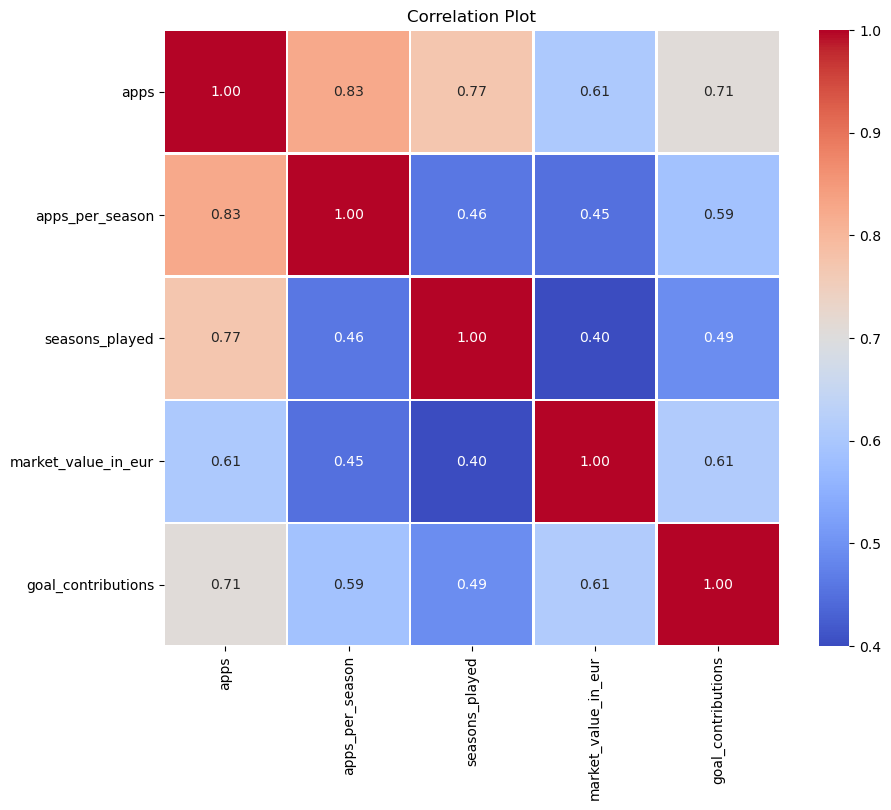

In [53]:
# Select the columns of interest
columns_of_interest = ['apps', 'apps_per_season', 'seasons_played', 'market_value_in_eur', 'goal_contributions']

# Create a correlation matrix to see the strength of correlation between different features
correlation_matrix = utw[columns_of_interest].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Plot')
plt.show()

<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"><a id="apps"></a>2. Appearances vs. Market Value</div>

In [25]:
# Sort the DataFrame by market value and appearances
top5_market_value = utw.sort_values(by='market_value_in_eur', ascending=False).head(10)
top5_appearances = utw.sort_values(by='apps', ascending=False).head(10)

# Select the columns of interest
apps_table = utw['apps']
market_value_in_eur = utw['market_value_in_eur']

# Create a scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(apps_table, market_value_in_eur, alpha=0.5)
plt.title('Appearances vs. Market Value', fontsize = 20)
plt.xlabel('Appearances', fontsize = 16)
plt.ylabel('Market Value (million EUR)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(True)

# Track players that have been annotated
annotated_players = set()

# Annotate top 5 market value players
texts = []
for _, player in top5_market_value.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['apps'], player['market_value_in_eur'], player['name'], fontsize=13, ha='right', va='bottom'))
        annotated_players.add(player['name'])

# Annotate top 5 appearances players
for _, player in top5_appearances.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['apps'], player['market_value_in_eur'], player['name'], fontsize=13, ha='right', va='bottom'))

        annotated_players.add(player['name'])
        
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

#Save the png and close the plot
plt.savefig('apps_vs_market_value.png')
plt.close()

In [26]:
# Sort the DataFrame by market value and appearances
top5_market_value = utw.sort_values(by='market_value_in_eur', ascending=False).head(10)
top5_appearances = utw.sort_values(by='apps_per_season', ascending=False).head(10)

# Select the columns of interest
apps_table = utw['apps_per_season']
market_value_in_eur = utw['market_value_in_eur']

# Create a scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(apps_table, market_value_in_eur, alpha=0.5)
plt.title('Appearances per Season vs. Market Value', fontsize = 20)
plt.xlabel('Appearances per Season', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Market Value (million EUR)', fontsize = 16)
plt.grid(True)

# Track players that have been annotated
annotated_players = set()

# Annotate top 5 market value players
texts = []
for _, player in top5_market_value.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['apps_per_season'], player['market_value_in_eur'], player['name'], fontsize=13, ha='right', va='bottom'))
        annotated_players.add(player['name'])

# Annotate top 5 appearances players
for _, player in top5_appearances.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['apps_per_season'], player['market_value_in_eur'], player['name'], fontsize=13, ha='right', va='bottom'))

        annotated_players.add(player['name'])
        
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

#Save the png and close the plot
plt.savefig('apps_per_season_vs_market_value.png')
plt.close()

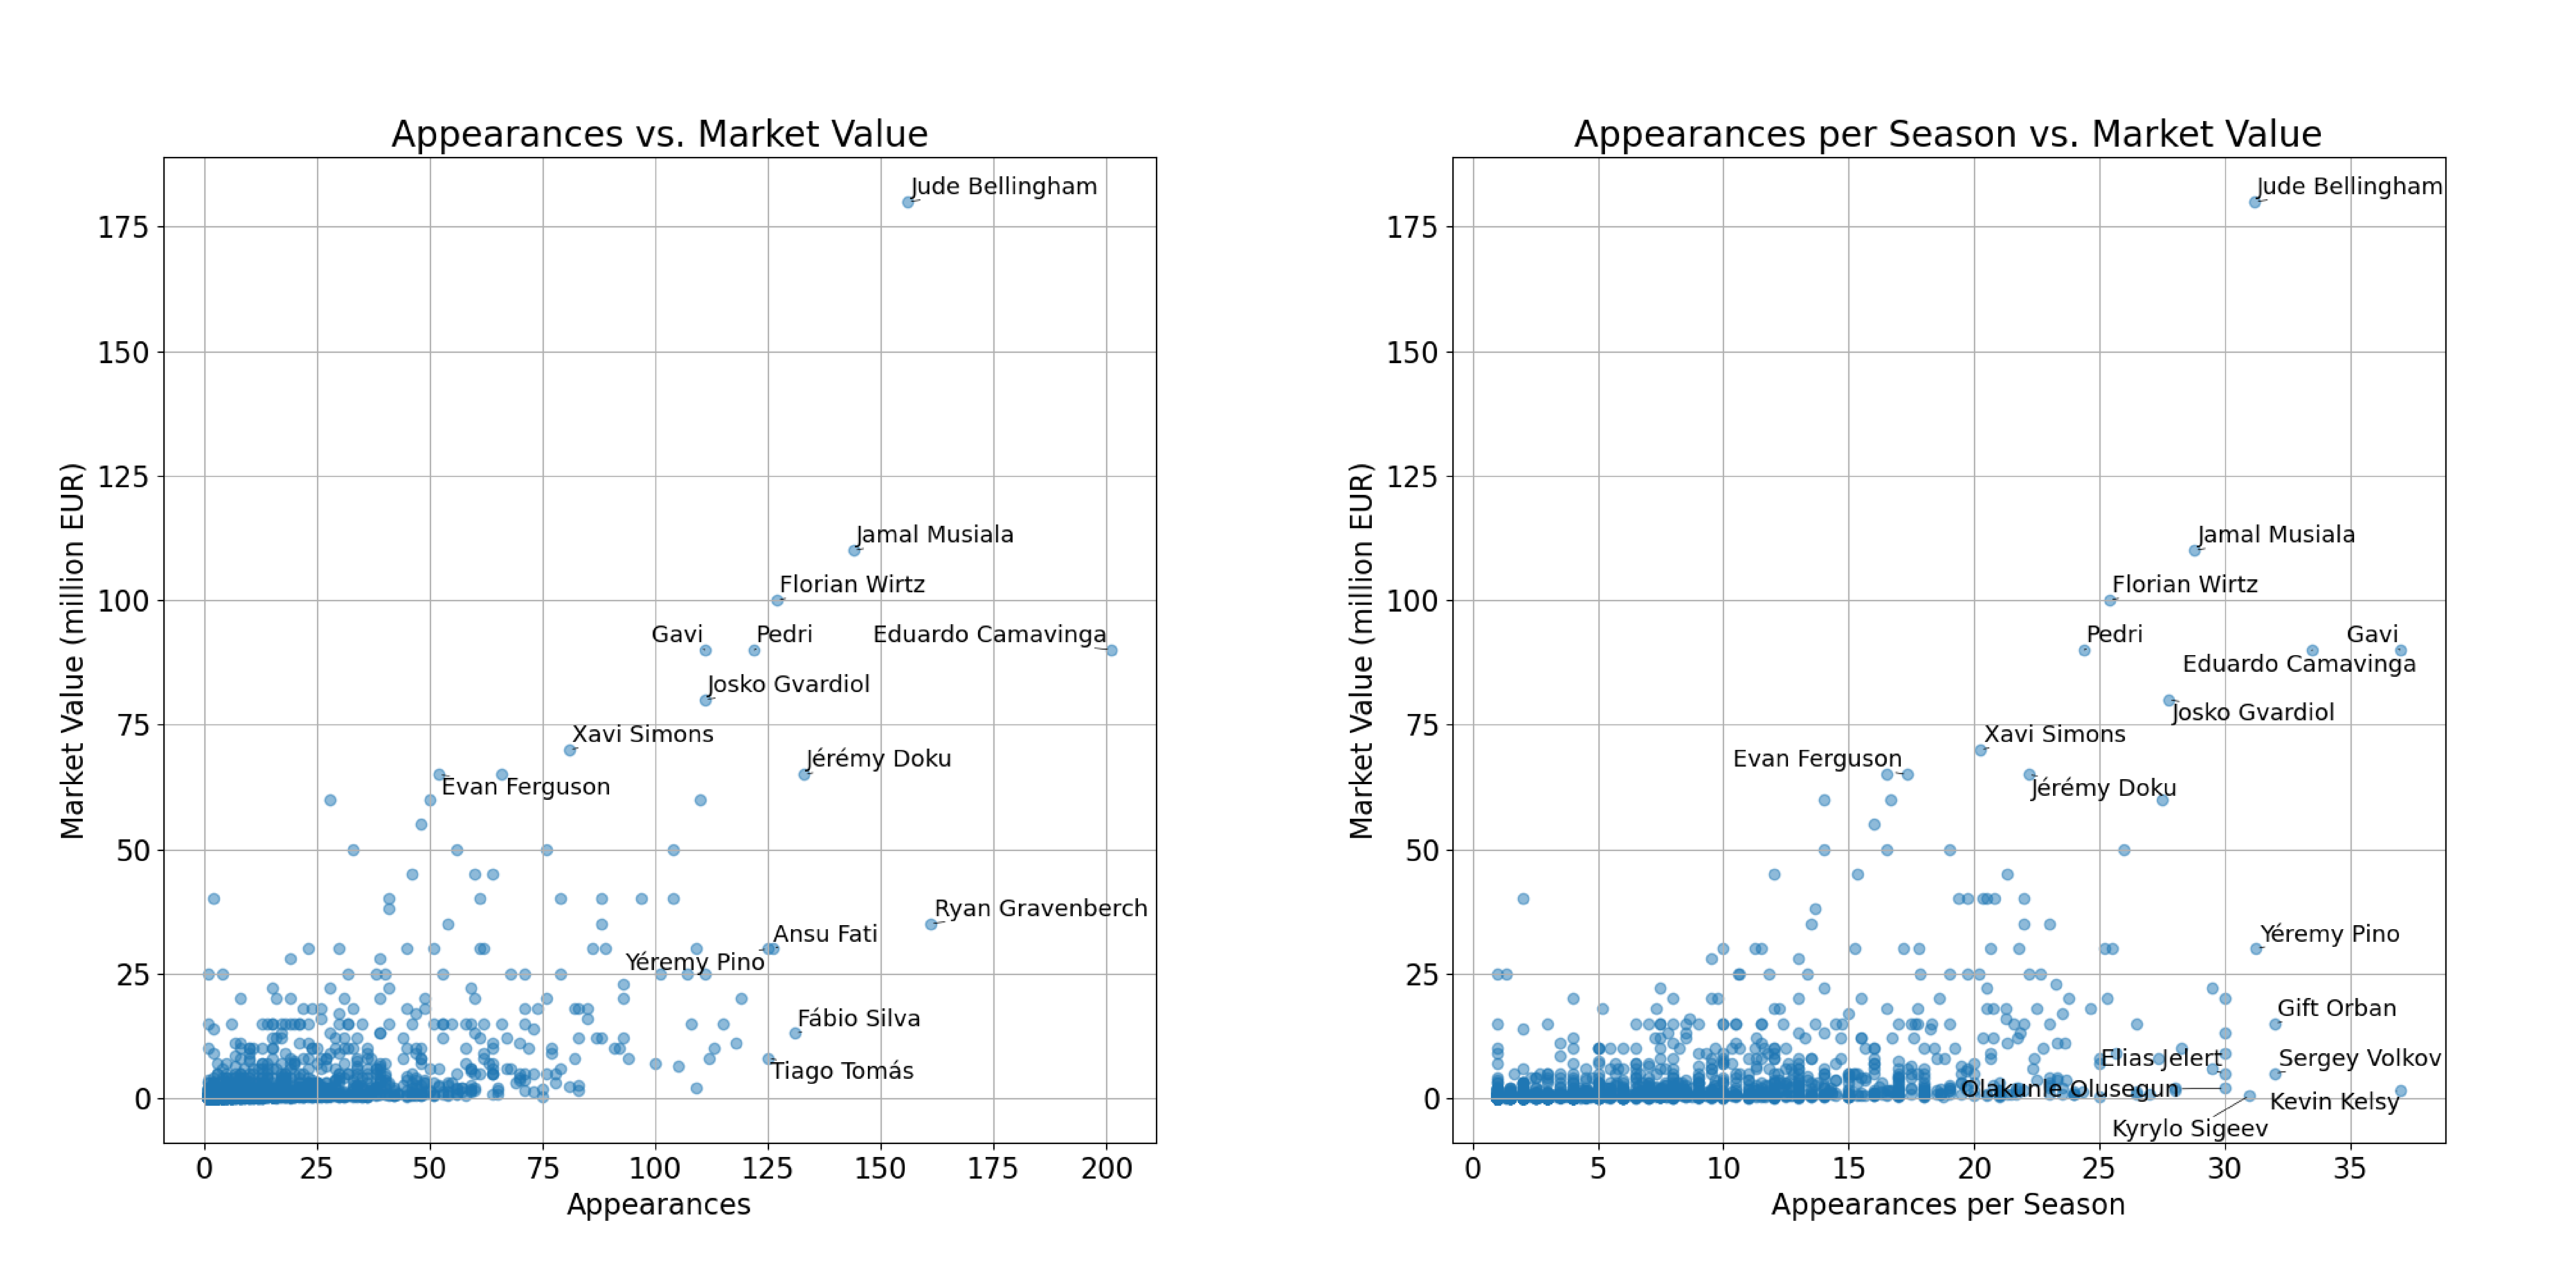

In [27]:
# Create subplots and load the saved plots
fig, axs = plt.subplots(1,2, figsize=(100, 50))

# Load Plot 1
img1 = plt.imread('apps_vs_market_value.png')
axs[0].imshow(img1)
axs[0].axis('off')

# Load Plot 2
img2 = plt.imread('apps_per_season_vs_market_value.png')
axs[1].imshow(img2)
axs[1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

### Now, let's take a look at players with less than 20 million EUR value

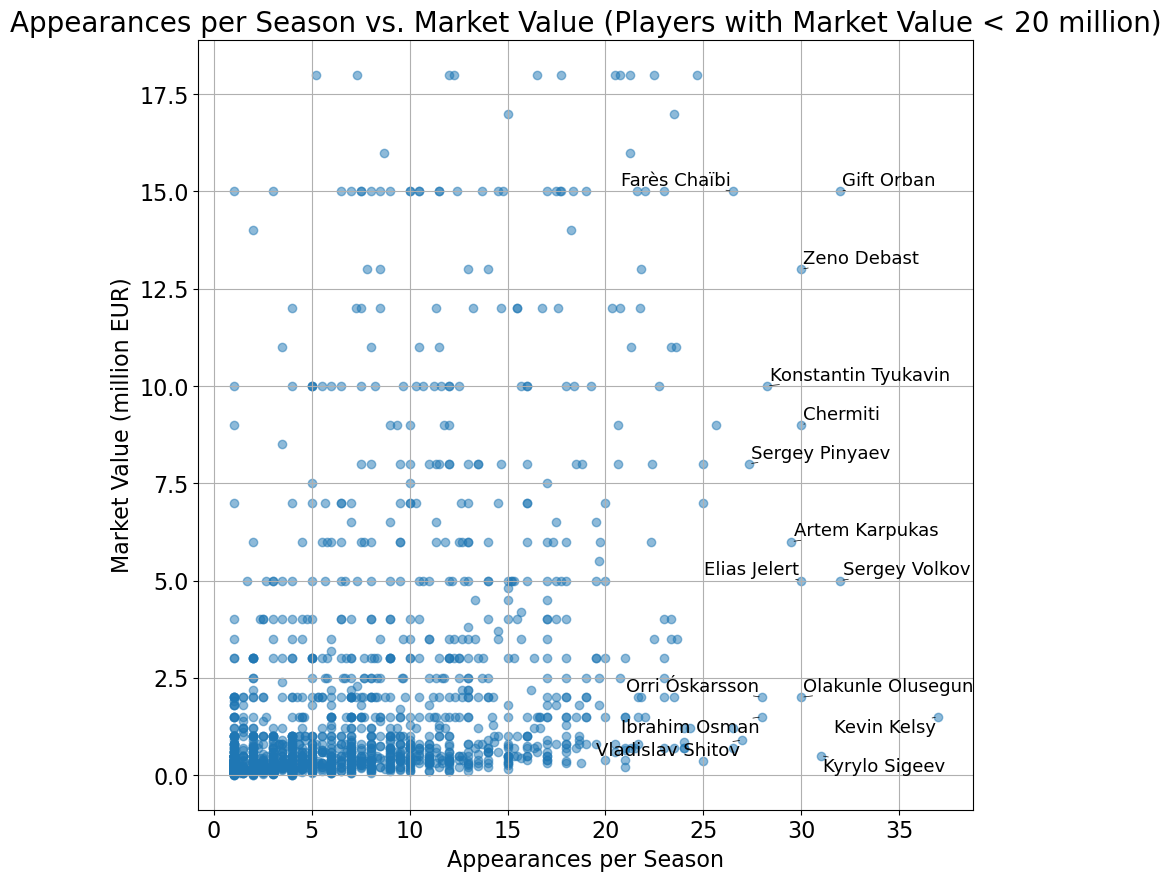

In [46]:
# Filter players with market value lower than 20 million
low_value_players = utw[utw['market_value_in_eur'] < 20]

# Sort the DataFrame by market value and appearances for low-value players
top15_low_value_appearances = low_value_players.sort_values(by='apps_per_season', ascending=False).head(15)

# Select the columns of interest for low-value players
low_value_apps_table = low_value_players['apps_per_season']
low_value_market_value_in_eur = low_value_players['market_value_in_eur']

# Create a scatter plot for low-value players
plt.figure(figsize=(10, 10))
scatter = plt.scatter(low_value_apps_table, low_value_market_value_in_eur, alpha=0.5)
plt.title('Appearances per Season vs. Market Value (Players with Market Value < 20 million)', fontsize=20)
plt.xlabel('Appearances per Season', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Market Value (million EUR)', fontsize=16)
plt.grid(True)

# Annotate top 15 appearances players for low-value players
texts_low_value = []
for _, player in top15_low_value_appearances.iterrows():
    texts_low_value.append(plt.text(player['apps_per_season'], player['market_value_in_eur'], player['name'], fontsize=13, ha='right', va='bottom'))

adjust_text(texts_low_value, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

# Save the png and close the plot for low-value players
plt.savefig('low_value_apps_per_season_vs_market_value.png')
plt.show()

<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"><a id="goal-contributions"></a>3. Goal Contributions vs. Market Value</div>



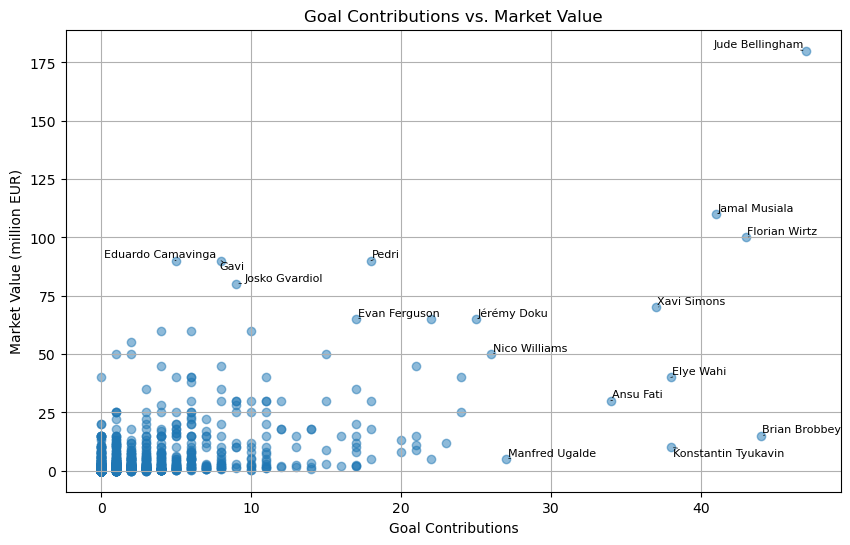

In [28]:
# Sort the DataFrame by market value and goal contributions for top 10 labels
top5_market_value = utw.sort_values(by='market_value_in_eur', ascending=False).head(10)
top5_appearances = utw.sort_values(by='goal_contributions', ascending=False).head(10)

# Select the columns of interest
contrib_table = utw['goal_contributions']
market_value_in_eur = utw['market_value_in_eur']

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(contrib_table, market_value_in_eur, alpha=0.5)
plt.title('Goal Contributions vs. Market Value')
plt.xlabel('Goal Contributions')
plt.ylabel('Market Value (million EUR)')
plt.grid(True)

# Track players that have been annotated
annotated_players = set()

# Annotate top 5 market value players
texts = []
for _, player in top5_market_value.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['goal_contributions'], player['market_value_in_eur'], player['name'], fontsize=8, ha='right', va='bottom'))
        annotated_players.add(player['name'])

# Annotate top 5 appearances players
for _, player in top5_appearances.iterrows():
    if player['name'] not in annotated_players:
        texts.append(plt.text(player['goal_contributions'], player['market_value_in_eur'], player['name'], fontsize=8, ha='right', va='bottom'))

        annotated_players.add(player['name'])
        
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.show()

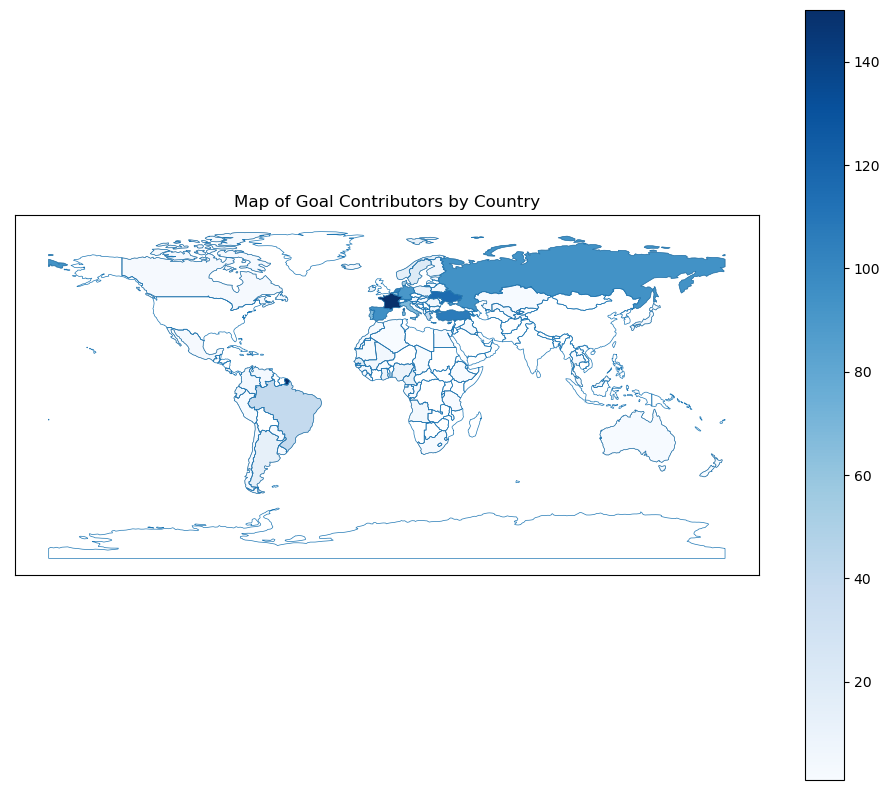

In [29]:
# Local path to the world shapefile
world_shapefile_path = 'geopandas_map/ne_110m_admin_0_countries.shp'

# Load the world shapefile from the local path
world = gpd.read_file(world_shapefile_path)

# Example contributor data (replace with your actual data)
contrib_data = utw['country_of_birth'].value_counts().to_dict()

# Convert the contributor data to a DataFrame
contrib_df = pd.DataFrame(list(contrib_data.items()), columns=['Country', 'Contributions'])

# Merge the world shapefile with the contributor data
world_contrib = world.merge(contrib_df, how='left', left_on='NAME', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Thinner country borders
world_contrib.boundary.plot(ax=ax, linewidth=0.5)

# Use a different colormap (Blues in this case)
world_contrib.plot(column='Contributions', cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.4', legend=True)

# Hide xticks and yticks
ax.set_xticks([])
ax.set_yticks([])

plt.title('Map of Goal Contributors by Country')
plt.show()

<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"><a id="value-changes"></a>4. Market Value Changes In Time</div>

In [30]:
value = pd.read_csv('player_valuations.csv')

In [31]:
value.head(2)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1


In [32]:
value['date'] = pd.to_datetime(value['date'])

In [33]:
value['market_value_in_eur'] = value['market_value_in_eur'] / 1000000

In [34]:
value = value[value['player_id'].isin(utw['player_id'].to_list())]

In [35]:
value['name'] = value['player_id'].apply(lambda x : utw[utw['player_id'] == x]['name'].values[0])

In [36]:
value['market_value_change'] = value.groupby('player_id')['market_value_in_eur'].diff()

In [37]:
highest_changes = value.groupby('player_id').max().sort_values('market_value_change', ascending = False).head(10).index

In [38]:
value_highest_changes = value[value['player_id'].isin(highest_changes)].sort_values(['player_id', 'market_value_in_eur'])

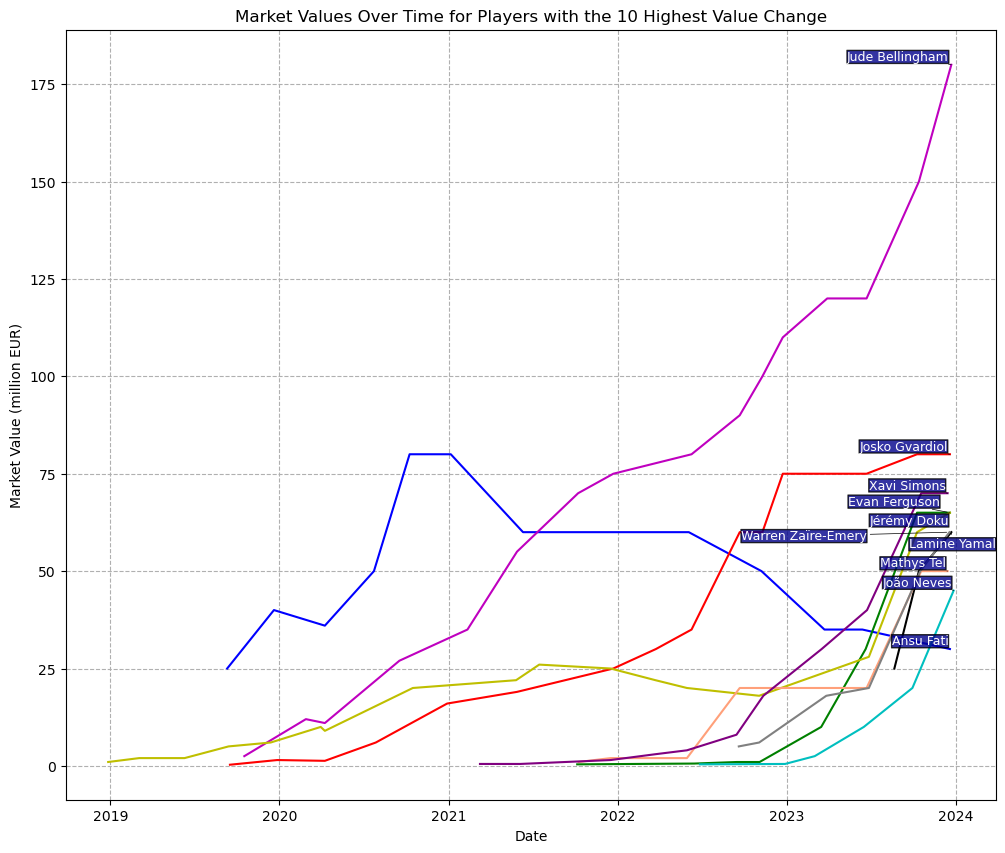

In [39]:
# Sort the DataFrame by 'name' and 'date'
value_sorted = value_highest_changes.sort_values(by=['name', 'date'])

# Plot all players in a single line plot
plt.figure(figsize=(12, 10))

# Define a list of colors for the lines
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FFA07A', '#808080', '#800080']

# Initialize a list to store text objects
texts = []

# Iterate through unique names and colors
for name, color in zip(value_sorted['name'].unique(), colors):
    player_data = value_sorted[value_sorted['name'] == name]
    line, = plt.plot(player_data['date'], player_data['market_value_in_eur'], label=f'{name}', color=color)

    # Add the text object to the list for adjust_text
    texts.append(plt.text(player_data['date'].iloc[-1], player_data['market_value_in_eur'].iloc[-1], f'{name}',
                          fontsize=9, ha='right', va='bottom', color='white',
                          bbox=dict(facecolor='darkblue', alpha=0.8, boxstyle='round,pad=0.001')))

# Customize the plot
plt.title('Market Values Over Time for Players with the 10 Highest Value Change')
plt.xlabel('Date')
plt.ylabel('Market Value (million EUR)')
plt.grid(True, linestyle='--')

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

# Show the plot
plt.show()

<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;"><a id="summary"></a>5. Summary and Key Insights</div>

1. Established superstars like Jude Bellingham, Jamal Musiala, and Gavi, playing for top clubs like Real Madrid, Bayern Munich, or Barcelona, already have high market values and consistently feature as top players with a high number of games per season. However, our analysis aims to uncover potential long-term talents beyond these already prominent names.


2. Numerous promising players with market values under 20 million EUR, such as Kevin Kelsy and Sergey Volkov, stand out by playing over 30 games per season, showcasing their potential despite their relatively low market values.


3. While players who contribute significantly to goals often command higher prices, we've identified U22 players like Brian Brobbey (Ajax), Konstantin Tyukavin (Dynamo Moscow), and Elye Wahi (Lens) who offer substantial contributions at a more affordable cost.


4. We can also see that most goal contributions are coming from French players while Turkey and Ukraine also has valuable potentials.


5. Examining market value changes over time reveals a continuous growth trend for current superstars. An exception is Ansu Fati, whose value significantly dropped after moving from FC Barcelona to Brighton & Hove Albion on loan, raising questions about his performance and adaptation.


6. Notable emergers with rapid value growth include Warren Zaire-Emery and Lamine Yamal. On the other hand, players like Evan Ferguson from Brighton & Hove Albion show steady value growth, positioning them as potential choices for larger football teams in the long run.

<div style="background-color: #34495e; color: white; font-size: 20px; text-align: center; padding: 20px; margin-top: 10px; margin-bottom: 10px;">Thank you!</div>